In [1]:
%cd /content/drive/MyDrive/ECS 289L SQ 2024/project

/content/drive/MyDrive/ECS 289L SQ 2024/project


In [ ]:
!pip install peft transformers
!pip install git+https://github.com/huggingface/diffusers

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.unet.load_attn_procs("./outputs/pytorch_lora_weights.safetensors")
pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


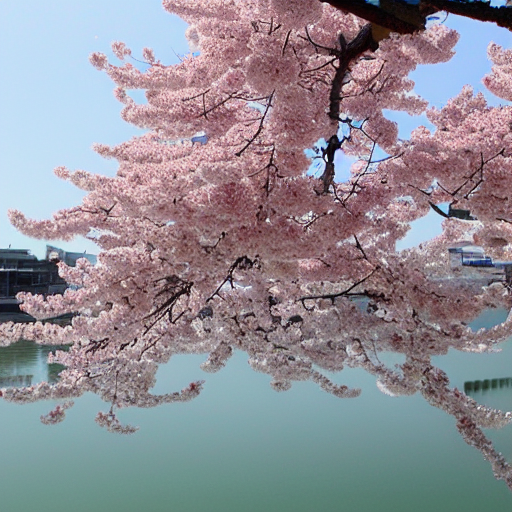

In [4]:
image = pipe("sakura", num_inference_steps=50, guidance_scale=7.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

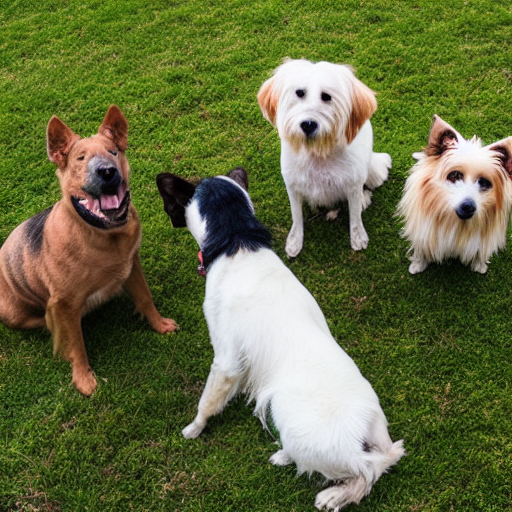

In [6]:
import pandas as pd

test_data = pd.read_csv("./data/eval_data.csv")
image = pipe(test_data['caption'][0], num_inference_steps=50, guidance_scale=7.5).images[0]
image